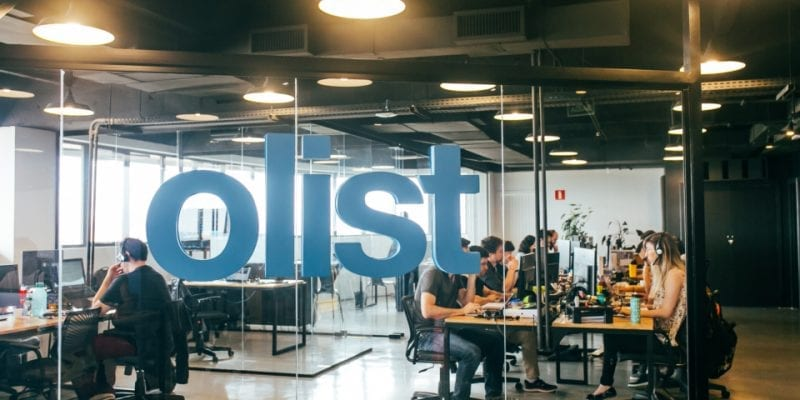

# Brazilian E-Commerce Olist Customers Segmentation

### OBJECTIVE
As a consultant team for Olist, a Brazilian e-commerce selling products online, we were asked to provide a customers segmentation for their company in order to assist their marketing team. Our main goal is to better understand Olist customers through their needs and expectations.<br>
Their aim is to use our analysis to improve Olist communication strategy.

### DATA
For this mission, Olist provided us with an anonymous dataset - including information about purchases records, purchased products, review scores, customers geographic location - from Septmber 2016 up until August 2018.

### DELIVERABLES
We need to provide Olist marketing team an actionable segmentation description; The market segment must produce the differential response when exposed to the market offering. This means that each of our segments must be different and unique from each other.<br>
A maintenance contract proposal based on the analysis of the stability of the segments over time will also be handed over to them.

### WORKSCOPE
We'll divide our project into 2 main parts:<br>

__PART 1:__ An Exploratory Data Analysis to analyze the provided datasets and summarize their main characteristcs. It will help us understand as much the Olist business itself as the customers behavior.
We'll take this opportunity to perform a supervised RFM analysis.
RFM analysis is a data driven customer behavior segmentation technique.

RFM stands for recency, frequency, and monetary value.

The  idea is to segment customers based on when their last purchase was, how often they’ve purchased in the past, and how much they’ve spent overall. All three of these measures have proven to be effective predictors of a customer's willingness to engage in marketing messages and offers.

It is still a powerful tool for eCommerce stores to use today. 

__PART 2:__ We'll use unsupervised machine learning algorithms to identify better strategies based on various RFM models


---------------------------------------------------------------

### Importing libraries

In [100]:
# ! usr/bin/env python 3
# coding: utf-8

# Importing librairies
import warnings
from sklearn.preprocessing import StandardScaler
from IPython.display import HTML
import numpy as np               # numerical data processing
import pandas as pd              # numerical tables & time series
import scipy as sp               # numerical integration, interpolation
import scipy.stats as st         # statistical functions
import seaborn as sns            # statistical data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# static, animated, and interactive visualizations in Python

from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import time

warnings.filterwarnings('ignore')
# PEP8 compliance
%load_ext pycodestyle_magic
%pycodestyle_on

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


### Function defined to help describing the characteristics of the input files

In [101]:
def duplicates(data):
    """Calculate the number of duplicates in dataframe data"""

    return len(data)-len(data.drop_duplicates())


def missing_cells(data):
    """Calculate the number of empty cells in dataframe data"""

    return data.isna().sum().sum()


def missing_cells_percent(data):
    """Calculate the percentage of empty cells in dataframe data"""

    return missing_cells(data)/(data.size)*100


def filled_cells(data):
    """Calculate the number of existing values in dataframe data"""

    return data.notna().sum()


def filled_cells_percent(data):
    """Calculate the percentage of existing values in dataframe data"""

    return filled_cells(data)/(len(data.index))*100

In [102]:
# Transforming the input files.csv to dataframe
# 1
customers = pd.read_csv("olist_customers_dataset.csv")
# 2
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
# 3
order_items = pd.read_csv("olist_order_items_dataset.csv")
# 4
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
# 5
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
# 6
orders = pd.read_csv("olist_orders_dataset.csv")
# 7
products = pd.read_csv("olist_products_dataset.csv")
# 8
sellers = pd.read_csv("olist_sellers_dataset.csv")
# 9
translation = pd.read_csv("product_category_name_translation.csv")

## 1. Input Files Overview 

### 1.1 Customers

In [103]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [104]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


This dataset has information about the customer and its location. Can be used to identify unique customers in the orders dataset and to find the orders delivery location.

__customer_unique_id__：Customer ID number<br>
__customer_zip_code_prefix__：Zip code of customer<br>
__customer_city__：City of customer<br>
__customer_state__：State of customer<br>
__seller_zip_code_prefix__：Zip code of seller<br>
__seller_city__：City of seller<br>
__seller_state__：State of seller<br>

At Olist system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

### 1.2 Geolocation

In [105]:
geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [106]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


This dataset has information Brazilian zip codes and its latitude & longitude coordinates.

### 1.3 Order Items

In [107]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [108]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


This dataset includes data about the items purchased within each order.

__order_item_id__：The number of the product in the order (ex：If there are three items in the order, the order_item_id is 1, 2, 3)<br>
__product_id__：Product ID number<br>
__seller_id__：Seller ID number<br>
__shipping_limit_date__：The deadline for the seller to deliver the goods to the logistics<br>
__price__：Product price<br>
__freight_value__：delivery fee<br>

### 1.4 Order Payments

In [109]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


This dataset includes data about the orders payment options.

__payment_sequential__: Number of different ways to pay<br>
__payment_type__: Way of paying<br>
__payment_installments__: Number of installments<br>
__payment_value__: Value of the transaction<br>

### 1.5 Order Reviews

In [110]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [111]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

__review_id__：The comment ID number<br>
__review_score__：Customer satisfaction<br>
__review_comment_title__：Comment title<br>
__review_comment_message__：Comment message<br>
__review_creation_date__：Time of inviteing customer make a comment<br>
__review_answer_timestamp__：Time of customer finish the comment<br>

### 1.6 Orders

In [112]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [113]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


This is the core dataset. From each order you might find all other information.<br>

__order_id__：Order ID number<br>
__customer_id__： Customer ID number<br>
__order_status__：Status of order progress<br>
__order_purchase_timestamp__：Time of order<br>
__order_approved_at__：Time of payment for the order<br>
__order_delivered_carrier_date__：Time of notifying the logistics in order process<br>
__order_delivered_customer_date__：Time of the product arrived at the consumer<br>
__order_estimated_delivery_date__：Estimated arrival time of the order<br>

### 1.7 Translation

In [114]:
translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


Translates the product/category name to english.

### 1.8 Products

In [115]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


This dataset includes data about the products sold by Olist.

__product_category_name__：Product category<br>
__product_name_lenght__：Number of words in product name<br>
__product_description_lenght__：Number of words in product description<br>
__product_photos_qty__：Number of product photo<br>
__product_weight_g__：Weight of product（grams)<br>
__product_length_cm__：Length of product (centimeter)<br>
__product_height_cm__：Height of product（centimeter）<br>
__product_width_cm__：Width of product（centimeter）<br>

In [116]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### 1.9 Sellers

In [117]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [118]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


This dataset includes data about the sellers that fulfilled orders made at Olist.

### 1.10 Summary

In [119]:
# INITIALISE FILES_SPEC TO SERIES DICTIONARY

list_files = ["olist_customers_dataset.csv",
              "olist_geolocation_dataset.csv",
              "olist_order_items_dataset.csv",
              "olist_order_payments_dataset.csv",
              "olist_order_reviews_dataset.csv",
              "olist_orders_dataset.csv",
              "olist_products_dataset.csv",
              "olist_sellers_dataset.csv",
              "product_category_name_translation.csv"]

files_spec = {'Total rows': pd.Series([len(customers),
                                       len(geolocation),
                                       len(order_items),
                                       len(order_payments),
                                       len(order_reviews),
                                       len(orders),
                                       len(products),
                                       len(sellers),
                                       len(translation)],
                                      index=list_files),
              'Total columns': pd.Series([len(customers.columns),
                                          len(geolocation.columns),
                                          len(order_items.columns),
                                          len(order_payments.columns),
                                          len(order_reviews.columns),
                                          len(orders.columns),
                                          len(products.columns),
                                          len(sellers.columns),
                                          len(translation.columns)],
                                         index=list_files),
              'Total duplicates': pd.Series([duplicates(customers),
                                             duplicates(geolocation),
                                             duplicates(order_items),
                                             duplicates(order_payments),
                                             duplicates(order_reviews),
                                             duplicates(orders),
                                             duplicates(products),
                                             duplicates(sellers),
                                             duplicates(translation)],
                                            index=list_files),
              'Total Missing cells': pd.Series([missing_cells(customers),
                                                missing_cells(geolocation),
                                                missing_cells(order_items),
                                                missing_cells(order_payments),
                                                missing_cells(order_reviews),
                                                missing_cells(orders),
                                                missing_cells(products),
                                                missing_cells(sellers),
                                                missing_cells(translation)],
                                               index=list_files),
              'Missing cells (%)': pd.Series([missing_cells_percent
                                              (customers),
                                              missing_cells_percent
                                              (geolocation),
                                              missing_cells_percent
                                              (order_items),
                                              missing_cells_percent
                                              (order_payments),
                                              missing_cells_percent
                                              (order_reviews),
                                              missing_cells_percent
                                              (orders),
                                              missing_cells_percent
                                              (products),
                                              missing_cells_percent
                                              (sellers),
                                              missing_cells_percent
                                              (translation)],
                                             index=list_files)}

# Creates Dataframe df_files_spec

df_files_spec = pd.DataFrame(files_spec)
index = df_files_spec.index
index.name = "Input File Name"
round(df_files_spec, 2)

,Total rows,Total columns,Total duplicates,Total Missing cells,Missing cells (%)
Input File Name,,,,,
olist_customers_dataset.csv,99441,5,0,0,0.00
olist_geolocation_dataset.csv,1000163,5,261831,0,0.00
olist_order_items_dataset.csv,112650,7,0,0,0.00
olist_order_payments_dataset.csv,103886,5,0,0,0.00
olist_order_reviews_dataset.csv,99224,7,0,145903,21.01
olist_orders_dataset.csv,99441,8,0,4908,0.62
olist_products_dataset.csv,32951,9,0,2448,0.83
olist_sellers_dataset.csv,3095,4,0,0,0.00
product_category_name_translation.csv,71,2,0,0,0.00


## 2. Dataset Exploration

### 2.1 Dataframes connection

The data is divided in multiple datasets for better understanding and organization.

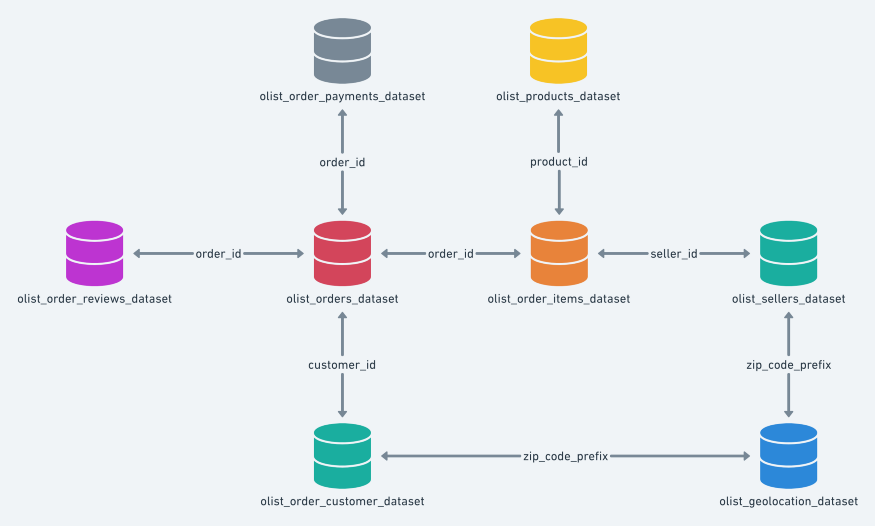

### 2.2 Category products & translation

The category products have the products name in brazilian while the category Translation have them in English. Let's start merging both dataframes and only keep the products categories in english.

In [120]:
prod_eng = pd.merge(translation, products,
                    on='product_category_name')

# We drop the product category name in portuguese to work with the english one
prod_eng = prod_eng.drop('product_category_name',
                         axis=1)
prod_eng.head(2)

,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0


Let's have a look at what is purchased on Olist.

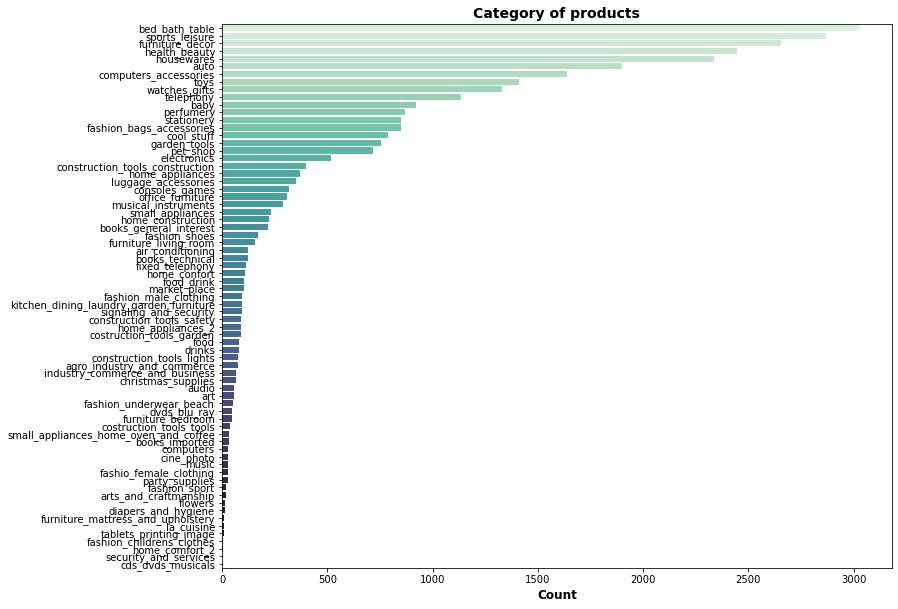

In [121]:
prod_eng['product_category_name_english'].value_counts()
fig = plt.figure(figsize=(12, 10))
ax = sns.countplot(y=prod_eng['product_category_name_english'],
                   palette='mako_r',
                   order=prod_eng['product_category_name_english']
                   .value_counts().index)
plt.title('Category of products', weight='bold', size=14)
plt.ylabel('')
plt.xlabel('Count', weight='bold', size=12)
plt.show()

We can reference 71 different categories of products and there are lots of redundant ones that can be regrouped together. By creating a dictionnary, we can see better the main groups of items and it might be more practical for potential future encoding. The number of categories reduces from 71 to 11.

In [122]:
product_cat_dict = {
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'garden_tools': 'construction',
    'home_construction': 'construction',

    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',

    'furniture_bedroom': 'furniture',
    'furniture_decor': 'furniture',
    'furniture_living_room': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'bed_bath_table': 'furniture',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'office_furniture': 'furniture',

    'home_appliances': 'home',
    'home_appliances_2': 'home',
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'air_conditioning': 'home',
    'housewares': 'home',
    'art': 'home',
    'arts_and_craftmanship': 'home',
    'flowers': 'home',
    'cool_stuff': 'home',

    'drinks': 'food_drink',
    'food': 'food_drink',
    'food_drink': 'food_drink',
    'la_cuisine': 'food_drink',

    'electronics': 'electronics',
    'audio': 'electronics',
    'tablets_printing_image': 'electronics',
    'telephony': 'electronics',
    'fixed_telephony': 'electronics',
    'small_appliances': 'electronics',
    'small_appliances_home_oven_and_coffee': 'electronics',
    'computers_accessories': 'electronics',
    'computers': 'electronics',

    'sports_leisure': 'sports_leisure',
    'consoles_games': 'sports_leisure',
    'musical_instruments': 'sports_leisure',
    'toys': 'sports_leisure',
    'cine_photo': 'sports_leisure',
    'dvds_blu_ray': 'sports_leisure',
    'cds_dvds_musicals': 'sports_leisure',
    'music': 'sports_leisure',
    'books_general_interest': 'sports_leisure',
    'books_imported': 'sports_leisure',
    'books_technical': 'sports_leisure',

    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    'baby': 'health_beauty',

    'christmas_supplies': 'supplies',
    'stationery': 'supplies',
    'party_supplies': 'supplies',
    'auto': 'supplies',
    'luggage_accessories': 'supplies',

    'watches_gifts': 'gifts',

    'agro_industry_and_commerce': 'misc',
    'industry_commerce_and_business': 'misc',
    'security_and_services': 'misc',
    'signaling_and_security': 'misc',
    'market_place': 'misc',
    'pet_shop': 'misc'
}

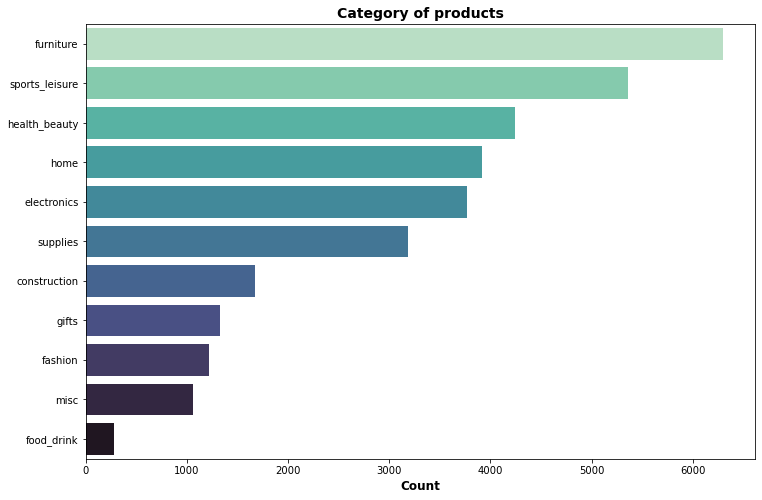

In [123]:
df_products = prod_eng.replace({"product_category_name_english":
                                product_cat_dict})
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(y=df_products['product_category_name_english'],
                   palette='mako_r',
                   order=df_products['product_category_name_english']
                   .value_counts().index)
plt.title('Category of products', weight='bold', size=14)
plt.ylabel('')
plt.xlabel('Count', weight='bold', size=12)
plt.show()

The project is focused on customers segmentation, the detailed information about the products is not useful to us so we drop few features.

In [124]:
features_useless = ["product_weight_g", "product_length_cm",
                    "product_height_cm", "product_width_cm",
                    "product_name_lenght", "product_description_lenght",
                    "product_photos_qty"]
all_products = df_products.drop(features_useless, axis=1)
all_products.head(2)

,product_category_name_english,product_id
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8


### 2.3 Orders Items & ID

In [125]:
orders_items = pd.merge(order_items, orders,
                        on='order_id')
orders_items.groupby(by="order_status").sum()["order_item_id"]

order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

We'll focus on delivered items to analyse finished transactions only.

In [126]:
orders_items = orders_items[orders_items["order_status"] == "delivered"]
orders_items = orders_items.drop('order_status', axis=1)

Let's now see the amount of transactions across the studied time period.

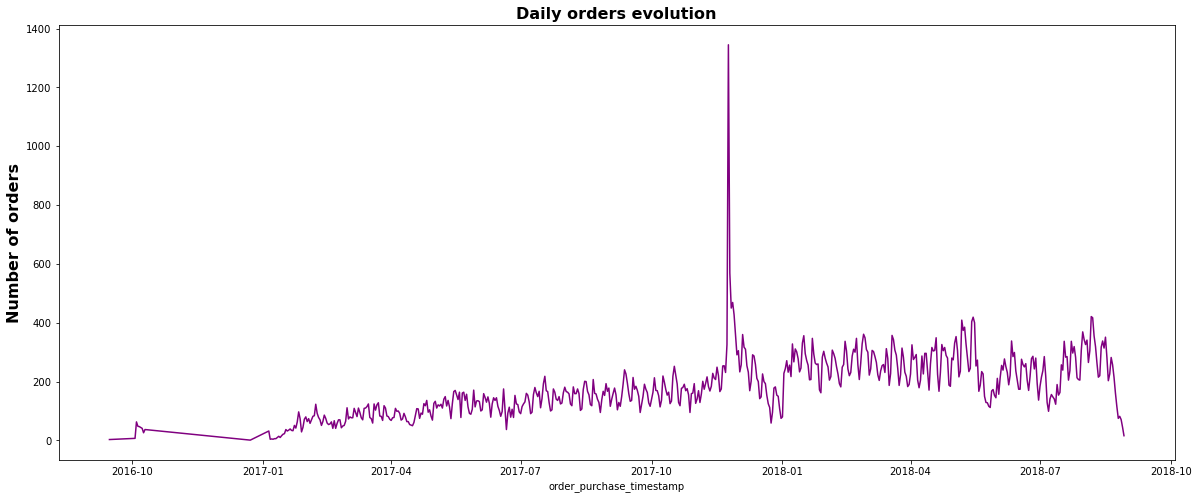

In [127]:
fig = plt.figure(figsize=(20, 8))
daily_orders = orders_items.groupby(orders_items["order_purchase_timestamp"]
                                    .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
ax = daily_orders.plot(color="purple")
ax.set_ylabel("Number of orders", size=16, weight='bold')
plt.title("Daily orders evolution", weight='bold', size=16)
plt.show()

Daily sales are slightly increasing to 300 between the end of 2016 and then end of 2018 with a big spike reaching 1400 orders during one day in November 2017. This increase in orders is likely to represent "Black Friday".

In [128]:
# Changing the data type for date columns
orders_items['order_purchase_timestamp'] = pd.to_datetime(
    orders_items['order_purchase_timestamp'])

orders_items['order_delivered_customer_date'] = pd.to_datetime(
    orders_items['order_delivered_customer_date'])

# Extracting attributes for purchase date - Year and Month
orders_items['order_purchase_year'] = \
        orders_items['order_purchase_timestamp'].apply(lambda x: x.year)
orders_items['order_purchase_month'] = \
        orders_items['order_purchase_timestamp'].apply(lambda x: x.month)
orders_items['order_purchase_name_month'] = \
        orders_items['order_purchase_timestamp']. \
        apply(lambda x: x.strftime('%b'))
orders_items['order_purchase_year_month'] = \
        orders_items['order_purchase_timestamp']. \
        apply(lambda x: x.strftime('%Y%m'))
orders_items['order_purchase_date'] = \
        orders_items['order_purchase_timestamp']. \
        apply(lambda x: x.strftime('%Y%m%d'))

In [129]:
# Extracting attributes for purchase date - Day and Day of Week
orders_items['order_purchase_day'] = orders_items['order_purchase_timestamp']\
                                                  .apply(lambda x: x.day)
orders_items['order_purchase_dayofweek'] = \
        orders_items['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders_items['order_purchase_dayofweek_name'] =\
                                orders_items['order_purchase_timestamp']\
                                .apply(lambda x: x.strftime('%a'))

### 2.4 Growing Business

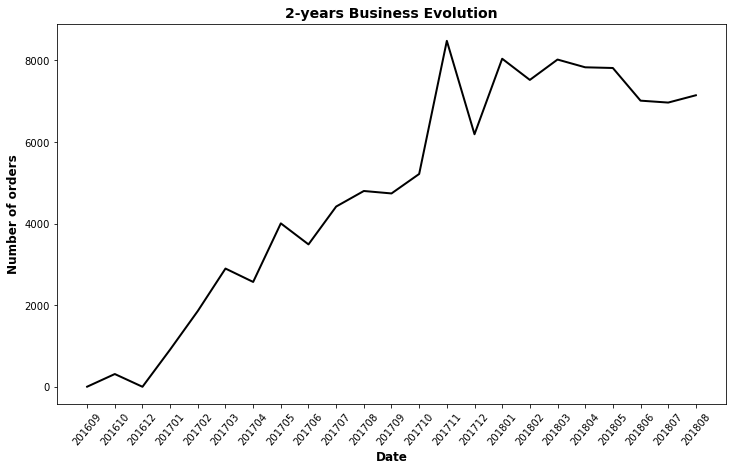

In [130]:
fig = plt.figure(figsize=(12, 7))
sns.lineplot(data=orders_items['order_purchase_year_month']
             .value_counts().sort_index(),
             color='black', linewidth=2)
plt.title('2-years Business Evolution', fontsize=14, weight='bold')
plt.xlabel('Date', fontsize=12, weight='bold')
plt.ylabel('Number of orders', fontsize=12, weight='bold')
plt.xticks(rotation=50)
plt.show()

As seen on the plot above, the monthly number of transactions peaked up progressively during the first year of Olist eistence while it tends to stabilize around 8000 orders per month between November 2017 & August 2018.

### 2.5 Shopping Time

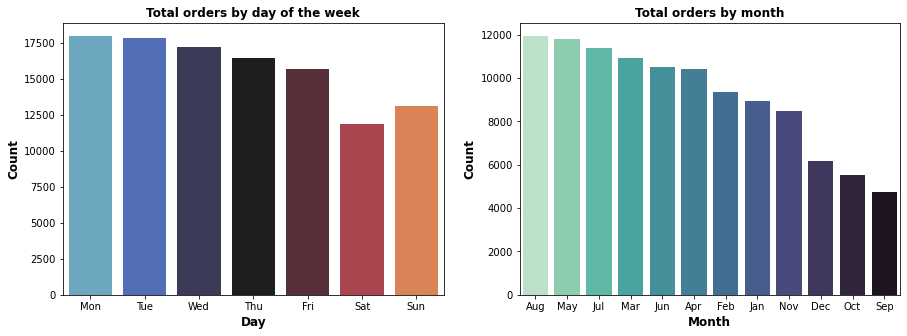

In [131]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x=orders_items['order_purchase_dayofweek'],
              palette='icefire', ax=axes[0])
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0].set_xticklabels(weekday_label)
axes[0].set_title('Total orders by day of the week', weight='bold', size=12)
axes[0].set_xlabel('Day', weight='bold', size=12)
axes[0].set_ylabel('Count', weight='bold', size=12)

sns.countplot(x=orders_items['order_purchase_name_month'],
              palette='mako_r', ax=axes[1],
              order=orders_items['order_purchase_name_month']
              .value_counts().index)
axes[1].set_title('Total orders by month', weight='bold', size=12)
axes[1].set_xlabel('Month', weight='bold', size=12)
axes[1].set_ylabel('Count', weight='bold', size=12)

plt.show()

In terms of customers habit, the highest number of ordered are placed early during the week while the weekends are less favored to place an order. The winter season is also the most favoured time of the year for the brazilian customers to place their orders.

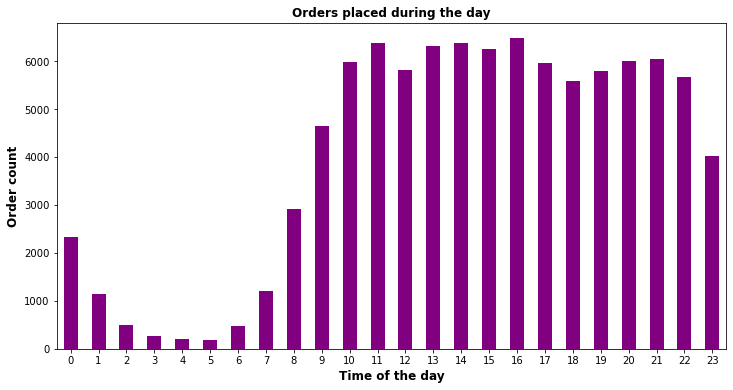

In [132]:
orders_items.groupby(orders_items['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12, 6), kind="bar", color='purple',
          legend=False)
plt.title("Orders placed during the day", weight='bold')
plt.xlabel("Time of the day", weight='bold', size=12)
plt.ylabel("Order count", weight='bold', size=12)
plt.xticks(rotation=0)
plt.show()

Identically, customers shop more in the afternoon and evening than in the night or morning.

### 2.6 Price & Payments

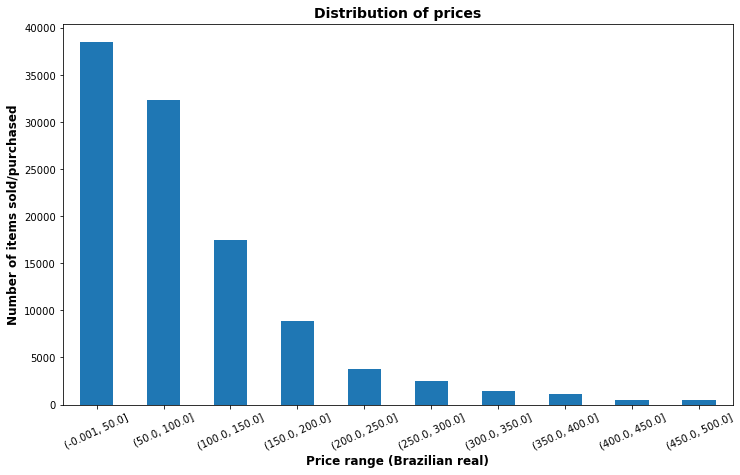

In [133]:
fig = plt.figure(figsize=(12, 7))
plt.rcParams["figure.figsize"] = (15, 7)
res = orders_items['price'].value_counts(sort=False,
                                         bins=range(0, 550, 50))\
                                         .plot.bar()
plt.title('Distribution of prices', fontsize=14, weight='bold')
plt.xlabel('Price range (Brazilian real)', fontsize=12, weight='bold')
plt.ylabel('Number of items sold/purchased', fontsize=12, weight='bold')
plt.xticks(rotation=25)
plt.show()

Most of the items purchased on Olist are priced under 200 Brazilian real (~30 euros).

Most and least expensive items

In [134]:
money = ['price', 'freight_value']
value = orders_items.groupby('order_id')[money]\
                .sum().sort_values(by='price', ascending=False).reset_index()
value.head(2).append(value.tail(2))

,order_id,price,freight_value
0,03caa2c082116e1d31e67e9ae3700499,13440.00,224.08
1,736e1922ae60d0d6a89247b851902527,7160.00,114.88
96476,3ee6513ae7ea23bdfab5b9ab60bffcb5,0.85,18.23
96477,6e864b3f0ec71031117ad4cf46b7f2a1,0.85,18.23


The least expensive item purchased cost 0.85 Br (without freight value) and the most expensive cost 13,440 Br (~ 2,000 euros). To be noted that the 2nd most expensive item cost half that price (~ 1,000 euros).

In [135]:
# We regroup price and freight value with the total
# amount spent by the customers
orders_items['total_spent'] = orders_items['price'] + \
                              orders_items['freight_value']
orders_items.drop("price", axis=1, inplace=True)
orders_items.drop("freight_value", axis=1, inplace=True)

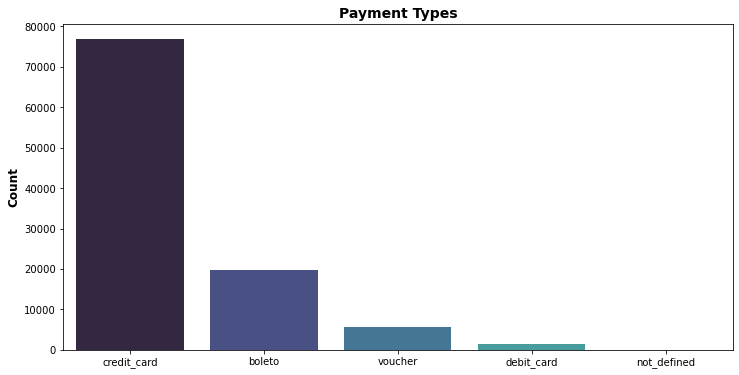

In [136]:
# What king of payments do customers use the most?
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x=order_payments['payment_type'], palette='mako')
plt.title('Payment Types', weight='bold', size=14)
plt.ylabel('Count', weight='bold', size=12)
plt.xlabel('')
plt.show()

Most of the customers (~ 80%) use a credit card for their payments followed by boleto (~ 20%) which is a payment method in Brazil.

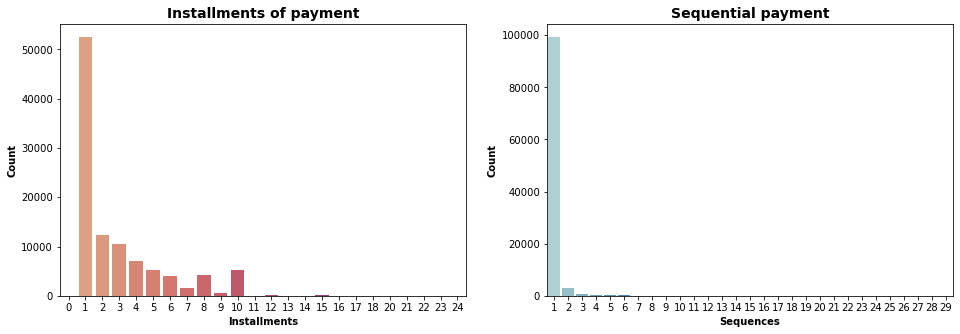

In [137]:
f, axes = plt.subplots(1, 2, figsize=(16, 5))

ax = sns.countplot(x=order_payments['payment_installments'],
                   palette='flare', ax=axes[0])
axes[0].set_title('Installments of payment', weight='bold', size=14)
axes[0].set_ylabel('Count', weight='bold')
axes[0].set_xlabel('Installments', weight='bold')

ax = sns.countplot(x=order_payments['payment_sequential'], palette='icefire',
                   ax=axes[1])
axes[1].set_title('Sequential payment', weight='bold', size=14)
axes[1].set_ylabel('Count', weight='bold')
axes[1].set_xlabel('Sequences', weight='bold')
plt.show()

### 2.7 Delivery of products and customers satisfaction

In [138]:
# Let's create a new feature for the products delivery time
orders_items["average_delivery_days"] = \
 (orders_items.order_delivered_customer_date
  - orders_items.order_purchase_timestamp).dt.days

orders_items.drop("order_delivered_customer_date", axis=1, inplace=True)

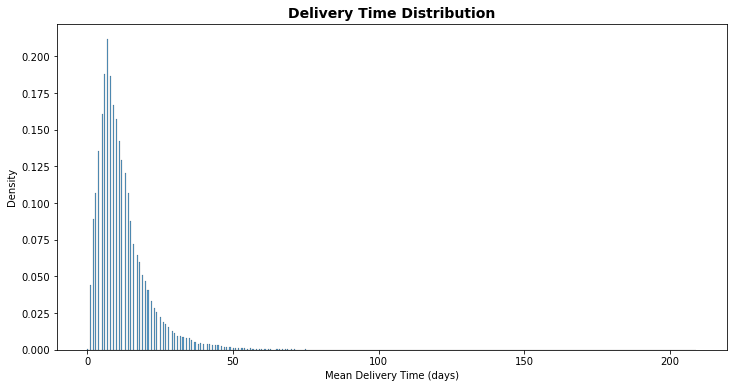

Max delivery time: 209.0


In [139]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=orders_items,
             x="average_delivery_days",
             stat="density")
plt.xlabel("Mean Delivery Time (days)")
plt.title("Delivery Time Distribution", weight='bold', size=14)
plt.show()
print('Max delivery time:', orders_items['average_delivery_days'].max())

Most products are delivered within 10 days but we can see that it could go up until 209 days for a customer to get his/her product.

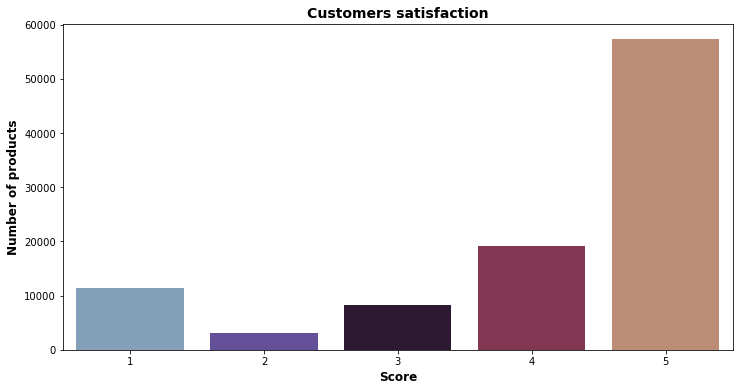

In [160]:
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x=order_reviews['review_score'], palette='twilight')
plt.title('Customers satisfaction', weight='bold', size=14)
plt.ylabel('Number of products', weight='bold', size=12)
plt.xlabel('Score', weight='bold', size=12)
plt.show()

Products are usually well scored, it is based on the delivery time and not on the quality of the product itself.

### 2.8 Geographical distribution of customers

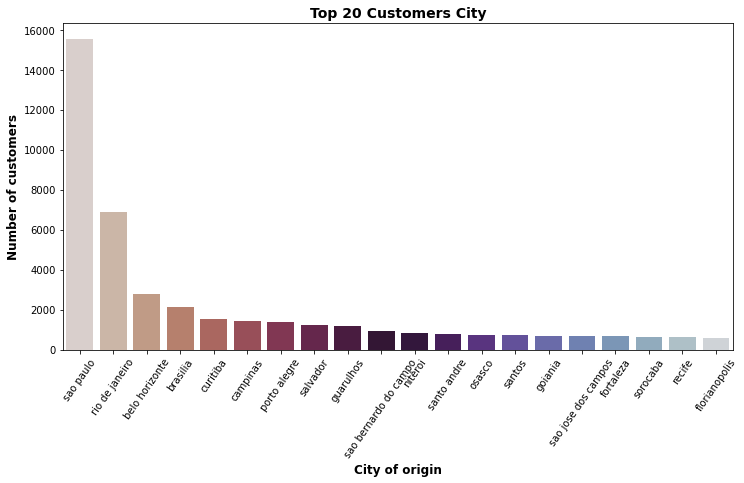

In [141]:
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x=customers['customer_city'], palette='twilight_r',
                   order=customers['customer_city']
                   .value_counts().iloc[:20].index)
plt.title('Top 20 Customers City', weight='bold', size=14)
plt.ylabel('Number of customers', weight='bold', size=12)
plt.xticks(rotation=55)
plt.xlabel('City of origin', weight='bold', size=12)
plt.show()

Olist is headquartered in Curitiba, Paraná, and also has an office in São Paulo, the most populated city in Brazil. The largest group of customers come from Sao Paulo with more than twice as many customers as in Rio de Janeiro but customers come from numerous cities across Brazil.

This quick analysis of Olist market gave us a better understanding of Olist business and we can start from these information to perform a classical 'supervised' RFM analysis.

## 3. RFM Analysis

The classical RFM model is the most frequently adopted churn segmentation technique which comprises three measures: recency, frequency and monetary value. These are combined into a three-digit RFM cell code, covering 4 equal quantiles. Among the three RFM measures, recency is often regarded as the most important one. Frequency and monetary could be considered as functions of each other and add a secondary dimension to rank users.

The simple hypothesis of this approach is that “People who are recently and frequently engaged with your business” will possibly buy again (have not churned) from your business. In our implementation we rank users based on these quantiles and assign uniform probability scores to each unique rank-order.<br>

The RFM model is based on three quantitative factors:

__Recency:__ How recently a customer has made a purchase<br>
__Frequency:__ How often a customer makes a purchase<br>
__Monetary:__ How much money a customer spends on purchases<br>

### 3.1 Parameters

Let's merge customers with orders_items and order reviews

In [142]:
cust_order = pd.merge(orders_items, customers,
                      on='customer_id')
cust_order = pd.merge(order_reviews, cust_order,
                      on='order_id')
cust_order.to_csv('custom_order.csv')

#### 3.1.1 Recency

In [143]:
latestdate = np.max(cust_order['order_purchase_timestamp'])
print(latestdate)
# Date of the last transaction

2018-08-29 15:00:37


In [144]:
cust_order['recency'] = cust_order['order_purchase_timestamp']\
                                  .apply(lambda x: (latestdate - x).days)
# grouping by customer_unique_id
ord_recency = cust_order.groupby("customer_id")["recency"].min()

#### 3.1.2 Frequency

In [145]:
frequency = cust_order.groupby("customer_id")["order_id"].size()

#### 3.1.3 Monetary

In [146]:
monetary = cust_order.groupby("customer_id")["total_spent"].sum()

In [147]:
df_rfm = pd.merge(pd.merge(ord_recency, monetary, on='customer_id'),
                  frequency, on='customer_id')
df_rfm.rename(columns={"order_id": "frequency"}, inplace=True)
df_rfm.rename(columns={"total_spent": "monetary"}, inplace=True)
df_rfm.reset_index()
df_rfm

,recency,monetary,frequency
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,287,114.74,1
000161a058600d5901f007fab4c27140,409,67.41,1
0001fd6190edaaf884bcaf3d49edf079,547,195.42,1
0002414f95344307404f0ace7a26f1d5,378,179.35,1
000379cdec625522490c315e70c7a9fb,149,107.01,1
...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,165,91.91,1
fffecc9f79fd8c764f843e9951b11341,152,81.36,1
fffeda5b6d849fbd39689bb92087f431,99,63.13,1


Our RMF dataframe above. It is our starting point to perform a preliminary supervised clustering.

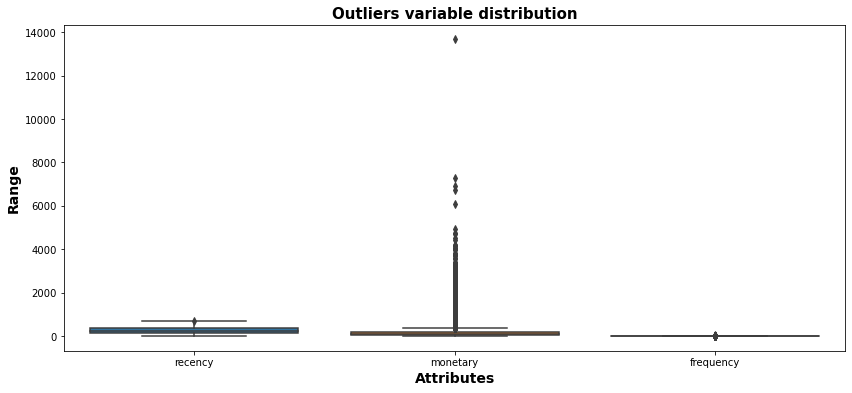

In [148]:
fig = plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_rfm, showfliers=True)
ax.axes.set_title("Outliers variable distribution", fontsize=15, weight="bold")
ax.set_xlabel("Attributes", fontsize=14, weight="bold")
ax.set_ylabel("Range", fontsize=14, weight="bold")
ax.tick_params(labelsize=10)
plt.show()

As seen previously, the highest transaction price is twice as much as the second highest one. We won't take it into account for the analysis.

In [149]:
df_rfm = df_rfm[(df_rfm.monetary < 8000)]
df_rfm.to_csv('rfm.csv')

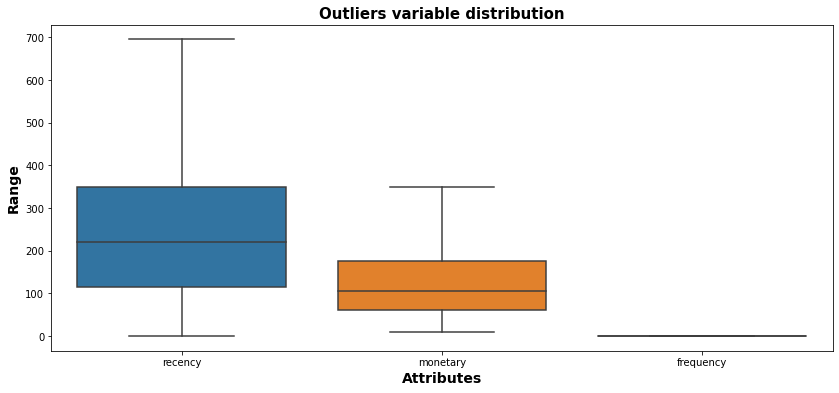

In [189]:
fig = plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_rfm, showfliers=False)
ax.axes.set_title("Outliers variable distribution", fontsize=15, weight="bold")
ax.set_xlabel("Attributes", fontsize=14, weight="bold")
ax.set_ylabel("Range", fontsize=14, weight="bold")
ax.tick_params(labelsize=10)
plt.show()

We can scale our data and plot it in 3D.

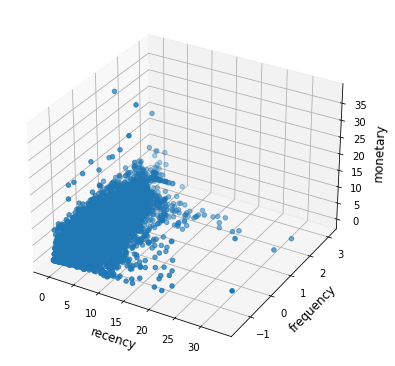

In [151]:
rfm_norm = preprocessing.scale(df_rfm)
rfm_norm = pd.DataFrame(data=rfm_norm,
                        columns=["recency", "frequency", "monetary"])
rfm_norm.to_csv('rfm_norm.csv')
fig = plt.figure(figsize=(20, 10))
x = rfm_norm.recency
y = rfm_norm.frequency
z = rfm_norm.monetary

ax = fig.add_subplot(3, 3, (1, 6), projection="3d")
ax.scatter(y, x, z)

ax.set_xlabel('recency', fontsize=12)
ax.set_ylabel('frequency', fontsize=12)
ax.set_zlabel('monetary', fontsize=12)

plt.show()

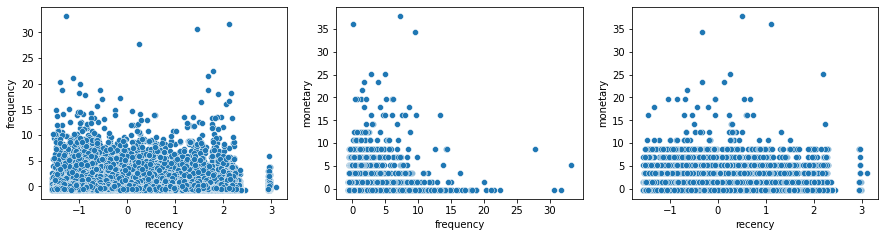

In [152]:
fig = plt.figure(figsize=(15, 12))

ax = fig.add_subplot(331)
sns.scatterplot(data=rfm_norm, y="frequency", x="recency", ax=ax)

ax = fig.add_subplot(332)
sns.scatterplot(data=rfm_norm, x="frequency", y="monetary", ax=ax)

ax = fig.add_subplot(333)
sns.scatterplot(data=rfm_norm, x="recency", y="monetary", ax=ax)
plt.show()

In [153]:
# RFM table standardized (mean at 0 and standard deviation at 1)
rfm_norm.describe()

,recency,frequency,monetary
count,9.583100e+04,9.583100e+04,9.583100e+04
mean,4.579973e-16,-4.917925e-17,-6.881063e-16
std,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.563307e+00,-7.037809e-01,-2.687874e-01
25%,-8.109936e-01,-4.587519e-01,-2.687874e-01
50%,-1.240987e-01,-2.560257e-01,-2.687874e-01
75%,7.198008e-01,7.818972e-02,-2.687874e-01
max,3.101037e+00,3.325667e+01,3.789414e+01


### 3.2 Supervised clustering: Quantile segmentation

Now we split the metrics into segments using quantiles.<br>
We will assign a score from 1 to 4 to Recency and Monetary :<br>
1 is the highest value (lowest recency and highest monetary), and 4 is the lowest value (highest recency and lowest monetary).<br>
As 87% of the customers only bought once, we assign 2 to frequency if they bought more than once (and default 1).
A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

__Recency__ = __1__: Short time since last purchase<br>
__Recency__ = __4__: Long time since last purchase<br>
__Frequency__ = __1__: One single purchase<br>
__Frequency__ = __2__: Multiple purchases<br>
__Monetary__ = __1__: High value purchase<br>
__Monetary__ = __4__: Low value purchase<br>

In [154]:
%pycodestyle_off
df_rfm_copy = df_rfm.copy()
df_rfm_copy['R_percentile'] = df_rfm_copy['recency'] \
                                          .rank(pct=True, ascending=False)
df_rfm_copy['R_score'] = pd.qcut(df_rfm_copy['R_percentile'], 4,
                                 labels=range(4, 0, -1))

df_rfm_copy['F_score'] = df_rfm_copy['frequency'] \
                                     .apply(lambda x:'1' if x==1 else '2')

df_rfm_copy['M_percentile'] = df_rfm_copy['monetary'] \
                                          .rank(pct=True, ascending=True)
df_rfm_copy['M_score'] = pd.qcut(df_rfm_copy['M_percentile'], 4,
                                 labels=range(4, 0, -1))

df_rfm_copy['rfm_score'] = df_rfm_copy['R_score'].astype(str) + \
                           df_rfm_copy['F_score'].astype(str) + \
                           df_rfm_copy['M_score'].astype(str)
df_rfm_copy

,recency,monetary,frequency,R_percentile,R_score,F_score,M_percentile,M_score,rfm_score
customer_id,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,287,114.74,1,0.342222,3,1,0.541724,2,312
000161a058600d5901f007fab4c27140,409,67.41,1,0.165515,4,1,0.290104,3,413
0001fd6190edaaf884bcaf3d49edf079,547,195.42,1,0.027048,4,1,0.787637,1,411
0002414f95344307404f0ace7a26f1d5,378,179.35,1,0.208403,4,1,0.755872,1,411
000379cdec625522490c315e70c7a9fb,149,107.01,1,0.668150,2,1,0.508238,2,212
...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,165,91.91,1,0.631784,2,1,0.433962,3,213
fffecc9f79fd8c764f843e9951b11341,152,81.36,1,0.662536,2,1,0.376726,3,213
fffeda5b6d849fbd39689bb92087f431,99,63.13,1,0.793099,1,1,0.258403,3,113


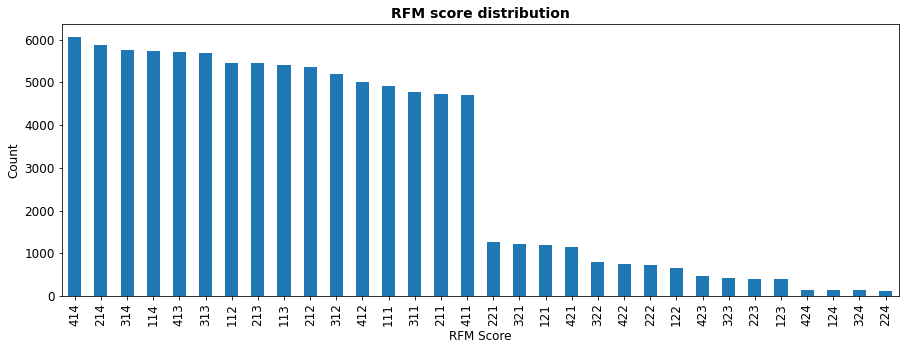

In [155]:
%pycodestyle_on
ax = df_rfm_copy['rfm_score'].value_counts().plot(kind='bar',
                                                  figsize=(15, 5), fontsize=12)
ax.set_title('RFM score distribution', fontsize= 14, weight= 'bold')
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [184]:
# We can define the different categories of customers
# through their RFM score

segt_map = {
    r'[1-2]2[1-2]': 'Champions',
    r'[1-2]1[1-2]': 'Big Spenders',
    r'[1-2][1-2][2-4]': 'New customers',
    r'[4][1-2][1-4]': 'About to lose',
    r'[2-3][1-2][1-2]': 'Needs reminder',
    r'[3][1-2][3-4]': 'Sleepy cheap spenders',
    }

df_rfm_copy['Segment'] = df_rfm_copy['rfm_score'].replace(segt_map, regex=True)
df_rfm_copy['Segment'] = [x for x in df_rfm_copy['Segment']]
rfm_attr = pd.concat([df_rfm_copy['rfm_score'],
                      df_rfm_copy['Segment']], axis=1)
rfm_attr.head(5)

,rfm_score,Segment
customer_id,,
00012a2ce6f8dcda20d059ce98491703,312,Needs reminder
000161a058600d5901f007fab4c27140,413,About to lose
0001fd6190edaaf884bcaf3d49edf079,411,About to lose
0002414f95344307404f0ace7a26f1d5,411,About to lose
000379cdec625522490c315e70c7a9fb,212,Big Spenders


__Champions__: Bought recently, more than once and spent "big" money

__Big spenders__: Bought quite recently, only once but spent "big" money

__New customers__: Bought recently, once or more

__About to lose__: Bought a long time ago, once or more and never came back

__Needs reminder__: Bought a while ago, once or more and spent a fair bit of money

__Sleepy cheap spenders__: Bough a while ago but spent little money

In [187]:
rfm_attr['Segment'].value_counts()

About to lose            24008
New customers            23542
Big Spenders             20454
Sleepy cheap spenders    12011
Needs reminder           11971
Champions                 3845
Name: Segment, dtype: int64

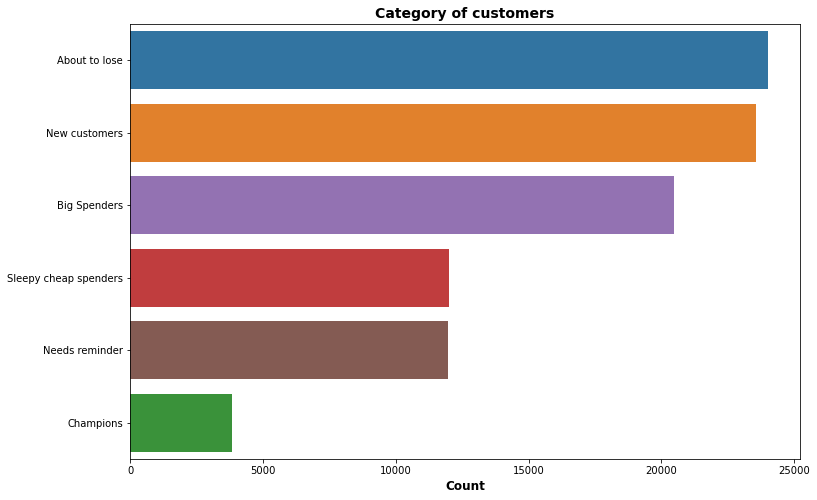

In [188]:
chop = rfm_attr['Segment'].value_counts().sort_values(ascending=True)
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(y=rfm_attr['Segment'],
                   palette=['#1f77b4', "#ff7f0e", '#9467bd',
                            '#d62728', "#8c564b", '#2ca02c'],
                   order=rfm_attr['Segment']
                   .value_counts().index)

plt.title('Category of customers', weight='bold', size=14)
plt.ylabel('')
plt.xlabel('Count', weight='bold', size=12)
plt.show()

We defined 6 different clusters of customers through this quantile segmentation but could have defined more or less clusters depending on Olist marketing team strategy. This is a personal segmentation based on RFM score.

We are now going to reproduce this kind of segmentation through unsupervised clustering algorithms.